Name: Kainat Moin
Roll= 23-Ai-48
final lab
programming for Ai
parctical lab B


In [ ]:
#practical lab B
import pandas as pd

# Load the data without header
df = pd.read_csv('student_performance(in).csv', header=None)

#new column names based on value patterns
df.columns = ["Hours_studied", "Math_score", "Passed", "Gender", "ID", "English_score"]

# Inspect the first 5 rows
print(df.head())


   Hours_studied  Math_score Passed  Gender  ID  English_score
0           15.6          57    Yes    Male   1             57
1           11.4          65    Yes  Female   2             49
2            6.4          83    Yes    Male   3             77
3           12.0          73    Yes    Male   4             63
4            7.1          49    Yes    Male   5             70


 one line justification  for each column  name  you chose


 Ans :Hours_studied – The first column contains decimal values like 15.6 and 11.4, which resemble the number of study hours per week.

Math_score– The second column has integers typically in the 50–80 range, which fits common math exam scores.

Passed – The third column only has "Yes", indicating a pass/fail status.

Gender – The fourth column contains "Male" and "Female", clearly indicating the student's gender.

ID – The fifth column contains unique integers in sequence (1, 2, 3...), indicating a student ID.

English_Score – The sixth column has numeric values similar to test scores, likely for the English subject.



In [ ]:
 #part B
# 1.create a new column  called "Efficiency" using this formula
#Efficiency =( Maths_score + English_score ) /Hours_studied
df['Efficiency'] = (df['Math_score'] + df['English_score']) / df['Hours_studied']
df.head()

# Remove outliers in 'Efficiency' using IQR
Q1 = df['Efficiency'].quantile(0.25)
Q3 = df['Efficiency'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Keep only rows within the IQR bounds
df_cleaned = df[(df['Efficiency'] >= lower_bound) & (df['Efficiency'] <= upper_bound)]

#Print number of rows removed
rows_removed = len(df) - len(df_cleaned)
print("Rows removed due to outliers in Efficiency",rows_removed)


print(df_cleaned.head())


Rows removed due to outliers in Efficiency 2
   Hours_studied  Math_score Passed  Gender  ID  English_score  Efficiency
0           15.6          57    Yes    Male   1             57    7.307692
1           11.4          65    Yes  Female   2             49   10.000000
2            6.4          83    Yes    Male   3             77   25.000000
3           12.0          73    Yes    Male   4             63   11.333333
4            7.1          49    Yes    Male   5             70   16.760563


In [ ]:
#part C
 #  check if there is a statistically significant relation between gender and passed state your conclusion
import pandas as pd
import scipy.stats as stats

# Example: Gender and Passed columns
contingency_table = pd.crosstab(df['Gender'], df['Passed'])
print(contingency_table)


Passed  No  Yes
Gender         
Female  14   42
Male     7   37


In [ ]:
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

print("Chi-square value",chi2)
print("P-value",p)


Chi-square value 0.740647237030601
P-value 0.3894536238830808


In [ ]:
if p < 0.05:
    print("There is a statistically significant relation between gender and passed state.")
else:
    print("There is no statistically significant relation between gender and passed state.")

There is no statistically significant relation between gender and passed state.


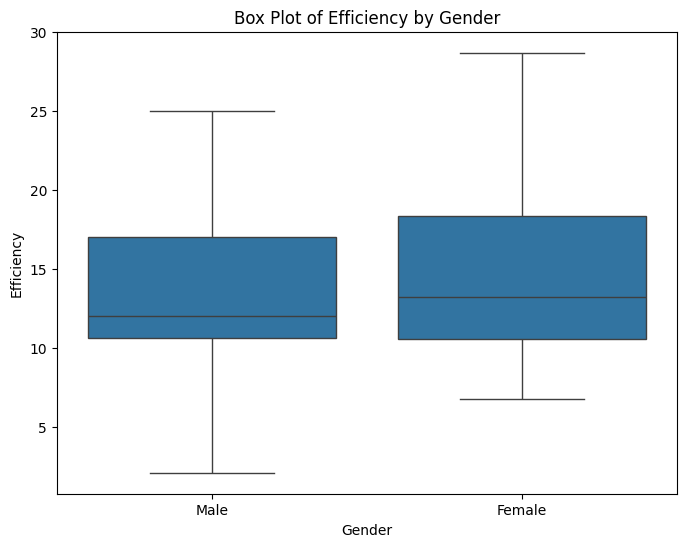

In [ ]:
#part D
#1.plot a box plot of Efficiencey group by gender
import matplotlib.pyplot as plt
import seaborn as sns

# Create a box plot
plt.figure(figsize=(8, 6))
sns.boxplot(x='Gender', y='Efficiency', data=df_cleaned)
plt.xlabel('Gender')
plt.ylabel('Efficiency')
plt.title('Box Plot of Efficiency by Gender')
plt.show()


part D
2. key observation about how efficiency  differents  between gender based on gender

Ans:

Females have a slightly higher median efficiency than male.

Females efficiency varies more, with more outliers and a wider range.
